In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
import os
from google.colab import files

# Upload kaggle.json
files.upload()

# Move kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Secure the API key


Saving kaggle.json to kaggle.json


In [3]:
# Download the dataset from Kaggle
!kaggle datasets download -d pkdarabi/bone-fracture-detection-computer-vision-project

# Extract the dataset
!unzip -q bone-fracture-detection-computer-vision-project.zip -d /content/dataset/

# Verify the files
!ls /content/dataset/


Dataset URL: https://www.kaggle.com/datasets/pkdarabi/bone-fracture-detection-computer-vision-project
License(s): Attribution 4.0 International (CC BY 4.0)
'bone fracture detection.v4-v4.yolov8'	 BoneFractureYolo8


In [4]:
dataset_path = "/content/dataset/BoneFractureYolo8/"


In [5]:
import os

# List files in the dataset directory
dataset_path = "/content/dataset/BoneFractureYolo8/"
for root, dirs, files in os.walk(dataset_path):
    print(f"📂 {root}")
    for file in files[:5]:  # Show first 5 files per folder
        print(f"   📄 {file}")


📂 /content/dataset/BoneFractureYolo8/
   📄 README.dataset.txt
   📄 data.yaml
📂 /content/dataset/BoneFractureYolo8/train
📂 /content/dataset/BoneFractureYolo8/train/images
   📄 image1_406_png.rf.a6ad65951a3f6b058b05b1f373606d12.jpg
   📄 image1_805_png.rf.dbacc20e2c7f5e00e2e6552ef6bc3d4d.jpg
   📄 image1_89_png.rf.7bd7d8ab703751bc1fc4d11404c40cca.jpg
   📄 image1_2355_png.rf.43ccd043131f32339f66c35fd3ea3b79.jpg
   📄 image1_521_png.rf.f4c4cff7e669f04c1b40ea549bd78abd.jpg
📂 /content/dataset/BoneFractureYolo8/train/labels
   📄 image2_685_png.rf.093fbdf89007a981ca513f87660c53f2.txt
   📄 image1_25_png.rf.8e835c52c2c19ccbe9b47a098900e592.txt
   📄 image1_1064_png.rf.b02470c0cffec50f5fe33a66696de9bc.txt
   📄 image1_5009_png.rf.bc9fdd51433f86f59e49cf716ffaeaee.txt
   📄 image1_251_png.rf.0cc3a57cbd69b93a905b1a3e4b1ecc50.txt
📂 /content/dataset/BoneFractureYolo8/valid
📂 /content/dataset/BoneFractureYolo8/valid/images
   📄 image1_216_png.rf.0b423fd44fe23382c0f302560b3621aa.jpg
   📄 image1_580_png.rf.7be

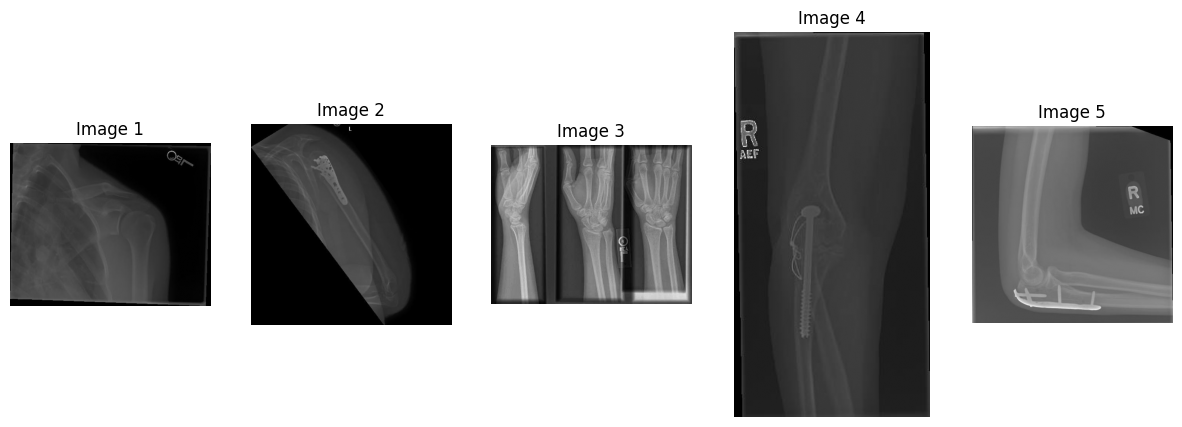

In [6]:
import cv2
import matplotlib.pyplot as plt
import random

# Define image path
image_folder = "/content/dataset/BoneFractureYolo8/test/images"
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Show 5 random images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    img_path = os.path.join(image_folder, random.choice(image_files))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
    axes[i].imshow(img, cmap='gray')
    axes[i].axis("off")
    axes[i].set_title(f"Image {i+1}")

plt.show()


In [1]:
import os

image_folder = "/content/dataset/BoneFractureYolo8/test/images"

# Check if the directory exists
if os.path.exists(image_folder):
    print("Directory exists")
else:
    print("Directory does NOT exist")


Directory exists


In [2]:
pip install ultralytics


In [9]:
with open('/content/dataset/BoneFractureYolo8/data.yaml', 'r') as f:
    print(f.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']

roboflow:
  workspace: veda
  project: bone-fracture-detection-daoon
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/veda/bone-fracture-detection-daoon/dataset/4


In [3]:
from ultralytics import YOLO

# Load YOLOv8 model (n=Nano, s=Small, m=Medium, l=Large, x=Extra large)
model = YOLO('yolov8n.pt')  # Using YOLOv8 Nano for fast training

# Train the model
model.train(
    data="/content/dataset/BoneFractureYolo8/data.yaml",
    epochs=50,  # Number of training epochs
    imgsz=640,  # Image size
    batch=8,  # Adjust based on GPU memory
    workers=2  # Use more if running on a powerful machine
)


Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/BoneFractureYolo8/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /content/dataset/BoneFractureYolo8/train/labels.cache... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 323.0±133.5 MB/s, size: 9.2 KB)


val: Scanning /content/dataset/BoneFractureYolo8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.06G      2.774      7.271      2.311          8        640: 100%|██████████| 454/454 [01:23<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.16it/s]


                   all        348        204   0.000978      0.399    0.00264   0.000713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.41G      2.551       5.91      2.089          6        640: 100%|██████████| 454/454 [01:15<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.82it/s]


                   all        348        204      0.371     0.0181     0.0179    0.00526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.42G      2.498      4.847       2.06          6        640: 100%|██████████| 454/454 [01:14<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.77it/s]


                   all        348        204      0.706     0.0595     0.0327    0.00837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.42G      2.469      4.234      2.093         10        640: 100%|██████████| 454/454 [01:13<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.07it/s]

                   all        348        204      0.221     0.0756     0.0565     0.0144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.42G      2.381      3.816      2.018          8        640: 100%|██████████| 454/454 [01:13<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  7.00it/s]

                   all        348        204      0.497      0.137       0.12     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.42G       2.33      3.612       1.98          4        640: 100%|██████████| 454/454 [01:13<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.95it/s]

                   all        348        204      0.455      0.161      0.135     0.0473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.42G      2.282      3.398      1.975          4        640: 100%|██████████| 454/454 [01:12<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.46it/s]

                   all        348        204      0.419      0.142      0.128     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.42G      2.254      3.295      1.967         10        640: 100%|██████████| 454/454 [01:14<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.49it/s]

                   all        348        204      0.154      0.195      0.107     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.44G      2.239      3.197      1.917          7        640: 100%|██████████| 454/454 [01:14<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.91it/s]

                   all        348        204      0.331      0.176      0.158     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.46G      2.204      3.088      1.909          5        640: 100%|██████████| 454/454 [01:14<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.37it/s]

                   all        348        204      0.299      0.207      0.145     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.46G      2.206      3.032      1.913          9        640: 100%|██████████| 454/454 [01:14<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.65it/s]

                   all        348        204       0.24      0.218      0.185     0.0696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.46G      2.144      2.868      1.894          9        640: 100%|██████████| 454/454 [01:14<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.65it/s]


                   all        348        204      0.301      0.236      0.177     0.0711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.47G      2.139       2.83      1.872          4        640: 100%|██████████| 454/454 [01:15<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.54it/s]

                   all        348        204      0.294      0.284      0.199     0.0755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.47G      2.075      2.789      1.816         13        640: 100%|██████████| 454/454 [01:13<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.60it/s]


                   all        348        204      0.227      0.234      0.211     0.0778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.47G      2.105      2.764      1.834          7        640: 100%|██████████| 454/454 [01:13<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  7.16it/s]


                   all        348        204      0.295      0.203      0.191     0.0732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.47G      2.042      2.651      1.792         11        640: 100%|██████████| 454/454 [01:12<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  7.75it/s]


                   all        348        204      0.459      0.248      0.242     0.0942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.47G      2.027      2.547      1.808          6        640: 100%|██████████| 454/454 [01:13<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.60it/s]

                   all        348        204       0.36      0.248      0.232     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.47G      2.032      2.547      1.786          4        640: 100%|██████████| 454/454 [01:14<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.57it/s]

                   all        348        204      0.161      0.237      0.148     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.47G      1.988      2.417      1.757          6        640: 100%|██████████| 454/454 [01:15<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.62it/s]


                   all        348        204      0.317      0.292      0.256     0.0974

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.47G      1.952      2.426      1.736         11        640: 100%|██████████| 454/454 [01:14<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.85it/s]


                   all        348        204      0.338      0.246      0.222      0.082

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.47G      1.949      2.342      1.729         12        640: 100%|██████████| 454/454 [01:14<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.81it/s]


                   all        348        204      0.415      0.258      0.264      0.089

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.47G       1.93      2.326      1.716         13        640: 100%|██████████| 454/454 [01:13<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.94it/s]


                   all        348        204      0.373      0.271       0.26     0.0863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.47G       1.85      2.185      1.668          4        640: 100%|██████████| 454/454 [01:14<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.80it/s]


                   all        348        204      0.288      0.283      0.231     0.0849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.47G      1.862      2.143      1.689          9        640: 100%|██████████| 454/454 [01:12<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.63it/s]

                   all        348        204      0.342      0.285      0.244     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.47G      1.854      2.094      1.663          7        640: 100%|██████████| 454/454 [01:14<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.69it/s]

                   all        348        204      0.323      0.305      0.247     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.47G      1.817      2.065      1.635          7        640: 100%|██████████| 454/454 [01:13<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.64it/s]

                   all        348        204      0.301      0.299      0.246     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.47G      1.768      1.936      1.603          7        640: 100%|██████████| 454/454 [01:14<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.48it/s]


                   all        348        204      0.305      0.329      0.273     0.0989

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.47G      1.782      1.927      1.603          9        640: 100%|██████████| 454/454 [01:15<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.63it/s]


                   all        348        204       0.43      0.267      0.272     0.0988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.47G      1.762      1.887      1.586          3        640: 100%|██████████| 454/454 [01:15<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.60it/s]

                   all        348        204      0.459       0.24      0.267     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.47G      1.743      1.854      1.564          6        640: 100%|██████████| 454/454 [01:16<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.57it/s]

                   all        348        204      0.511      0.285      0.302      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.47G      1.689      1.798      1.556         10        640: 100%|██████████| 454/454 [01:14<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.74it/s]

                   all        348        204      0.391      0.282      0.268     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.47G      1.682      1.743      1.555          8        640: 100%|██████████| 454/454 [01:14<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.35it/s]

                   all        348        204      0.363      0.254      0.253     0.0885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.47G      1.666      1.723      1.522         10        640: 100%|██████████| 454/454 [01:15<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.43it/s]

                   all        348        204      0.316      0.294      0.256      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.47G      1.655      1.707      1.531          5        640: 100%|██████████| 454/454 [01:15<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.64it/s]

                   all        348        204      0.399       0.27       0.27     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.47G      1.629      1.676      1.509          6        640: 100%|██████████| 454/454 [01:14<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.68it/s]


                   all        348        204      0.366      0.323      0.269     0.0945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.47G      1.626      1.594      1.484          8        640: 100%|██████████| 454/454 [01:15<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.69it/s]


                   all        348        204      0.384      0.299      0.294       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.47G      1.577      1.558      1.476          9        640: 100%|██████████| 454/454 [01:14<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.59it/s]

                   all        348        204      0.348      0.291      0.276      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.47G      1.589      1.566      1.472          4        640: 100%|██████████| 454/454 [01:14<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.22it/s]

                   all        348        204      0.441       0.31      0.295      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.47G      1.567      1.492      1.438          4        640: 100%|██████████| 454/454 [01:13<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.87it/s]

                   all        348        204      0.434      0.261      0.281     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.47G      1.522      1.414      1.425          5        640: 100%|██████████| 454/454 [01:13<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.25it/s]

                   all        348        204      0.346      0.343      0.294       0.11


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.47G      1.479      1.309      1.498          6        640: 100%|██████████| 454/454 [01:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00, 10.14it/s]

                   all        348        204      0.409      0.281       0.29      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.47G      1.434      1.252      1.454          4        640: 100%|██████████| 454/454 [01:08<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.79it/s]

                   all        348        204      0.478      0.257      0.281      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.47G      1.405       1.17      1.437          2        640: 100%|██████████| 454/454 [01:08<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.97it/s]

                   all        348        204      0.401      0.294      0.289      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.47G      1.368      1.167      1.415          2        640: 100%|██████████| 454/454 [01:08<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.51it/s]


                   all        348        204      0.452      0.295      0.292      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.47G      1.336      1.108      1.381          4        640: 100%|██████████| 454/454 [01:08<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  9.73it/s]

                   all        348        204      0.435      0.281      0.275      0.099



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.47G      1.332      1.085      1.379          3        640: 100%|██████████| 454/454 [01:08<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  7.20it/s]

                   all        348        204      0.476       0.27      0.287      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.47G      1.323      1.074      1.357          2        640: 100%|██████████| 454/454 [01:08<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00, 10.11it/s]

                   all        348        204      0.478      0.272      0.284      0.098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.47G      1.297      1.049      1.355          5        640: 100%|██████████| 454/454 [01:08<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.86it/s]

                   all        348        204      0.475      0.281      0.302      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.47G      1.273      1.025      1.336          4        640: 100%|██████████| 454/454 [01:08<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00, 10.09it/s]

                   all        348        204      0.363      0.293      0.282      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.47G      1.242     0.9753       1.31          3        640: 100%|██████████| 454/454 [01:08<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.81it/s]

                   all        348        204      0.489      0.245      0.291      0.105



50 epochs completed in 1.061 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.23it/s]


                   all        348        204      0.409      0.281      0.289      0.112
        elbow positive         28         29      0.209      0.172      0.154     0.0711
      fingers positive         41         48      0.331      0.188      0.212     0.0609
      forearm fracture         37         43      0.671      0.442      0.511      0.212
               humerus         31         36      0.717      0.563      0.595      0.221
     shoulder fracture         19         20       0.39       0.25      0.228     0.0958
        wrist positive         17         28      0.136     0.0714     0.0357     0.0101
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d193d12bb10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [5]:
model.val()


Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 411.4±183.3 MB/s, size: 10.4 KB)


val: Scanning /content/dataset/BoneFractureYolo8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:03<00:00, 11.09it/s]


                   all        348        204      0.444      0.271       0.29      0.112
        elbow positive         28         29       0.23      0.172      0.135     0.0574
      fingers positive         41         48      0.391      0.188      0.213     0.0616
      forearm fracture         37         43      0.697      0.442      0.528      0.218
               humerus         31         36       0.74        0.5      0.601      0.224
     shoulder fracture         19         20      0.413       0.25      0.228     0.0977
        wrist positive         17         28      0.194     0.0714     0.0365       0.01
Speed: 0.5ms preprocess, 6.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train23


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d193cad1850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     